# Cap Recognizer

In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [2]:
from fastai.vision.all import *

In [3]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Work/Food_recognition

/content/drive/My Drive/Work/Food_recognition


In [6]:
#!export
model = load_learner('models/food-recognizer-v1.pkl')

In [7]:
food_labels = (
    'bbq ribs',
    'burger',
    'cheesecake',
    'curry',
    'donut',
    'dumplings',
    'fried chicken',
    'fries', 'hot dog',
    'ice cream',
    'noodles',
    'omelette',
    'pancakes',
    'pasta',
    'pizza',
    'rice dish',
    'salad',
    'sandwich',
    'smoothie',
    'soup',
    'steak',
    'stew',
    'sushi',
    'taco',
    'waffles'
)

In [8]:
#!export

label_mapping = {
    "bbq ribs": "BBQ Ribs 🍖",
    "burger": "Burger 🍔",
    "cheesecake": "Cheesecake 🍰",
    "curry": "Curry 🍛",
    "donut": "Donut 🍩",
    "dumplings": "Dumplings 🥟",
    "fried chicken": "Fried Chicken 🍗",
    "fries": "Fries 🍟",
    "hot dog": "Hot Dog 🌭",
    "ice cream": "Ice Cream 🍨",
    "noodles": "Noodles 🍜",
    "omelette": "Omelette 🥚",
    "pancakes": "Pancakes 🥞",
    "pasta": "Pasta 🍝",
    "pizza": "Pizza 🍕",
    "rice dish": "Rice Dish 🍚",
    "salad": "Salad 🥗",
    "sandwich": "Sandwich 🥪",
    "smoothie": "Smoothie 🥤",
    "soup": "Soup 🍲",
    "steak": "Steak 🥩",
    "stew": "Stew 🍛",
    "sushi": "Sushi 🍣",
    "taco": "Taco 🌮",
    "waffles": "Waffles 🧇"
}
def recognize_image(image):
    pred, idx, probs = model.predict(image)  # Get predictions
    predictions_dict = dict(zip(food_labels, map(float, probs)))  # Convert probs to dictionary

    # Get the label with the highest probability
    top_label = max(predictions_dict, key=predictions_dict.get)
    top_prob = predictions_dict[top_label]  # Get the highest probability

    # Get the formatted label with emoji
    formatted_label = label_mapping.get(top_label, top_label)

    # Return both label and probability
    return f"Selected item is {formatted_label}"




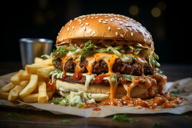

In [9]:
img = PILImage.create(f'test_item/check_0.jpg')
img.thumbnail((192,192))
img

In [10]:
recognize_image(img)

'Selected item is Burger 🍔'

In [11]:
#!export
image = gr.Image(type="pil")
label = gr.Label()
examples = [
    'test_item/check_0.jpg',
    'test_item/check_1.jpg',
    'test_item/check_2.jpg',
    'test_item/check_3.jpg',
    'test_item/check_4.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d327d60316a71d92b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')